In [30]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv('/content/hepatitis.csv')
df = df.replace('?', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          155 non-null    int64 
 1   target      155 non-null    int64 
 2   age         155 non-null    int64 
 3   gender      155 non-null    int64 
 4   steroid     154 non-null    object
 5   antivirals  155 non-null    int64 
 6   fatigue     154 non-null    object
 7   malaise     154 non-null    object
 8   anorexia    154 non-null    object
 9   liverBig    145 non-null    object
 10  liverFirm   144 non-null    object
 11  spleen      150 non-null    object
 12  spiders     150 non-null    object
 13  ascites     150 non-null    object
 14  varices     150 non-null    object
 15  bili        149 non-null    object
 16  alk         126 non-null    object
 17  sgot        151 non-null    object
 18  albu        139 non-null    object
 19  protime     88 non-null     object
 20  histology 

In [32]:
df['steroid'] = df['steroid'].fillna(df['steroid'].mode()[0])
df['fatigue'] = df['fatigue'].fillna(df['fatigue'].mode()[0])
df['malaise'] = df['malaise'].fillna(df['malaise'].mode()[0])
df['anorexia'] = df['anorexia'].fillna(df['anorexia'].mode()[0])
df['liverBig'] = df['liverBig'].fillna(df['liverBig'].mode()[0])
df['liverFirm'] = df['liverFirm'].fillna(df['liverFirm'].mode()[0])
df['spleen'] = df['spleen'].fillna(df['spleen'].mode()[0])
df['spiders'] = df['spiders'].fillna(df['spiders'].mode()[0])
df['ascites'] = df['ascites'].fillna(df['ascites'].mode()[0])
df['varices'] = df['varices'].fillna(df['varices'].mode()[0])
df['bili'] = df['bili'].fillna(df['bili'].median())
df['alk'] = df['alk'].fillna(df['alk'].median())
df['sgot'] = df['sgot'].fillna(df['sgot'].median())
df['albu'] = df['albu'].fillna(df['albu'].median())
df['protime'] = df['protime'].fillna(df['protime'].median())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          155 non-null    int64 
 1   target      155 non-null    int64 
 2   age         155 non-null    int64 
 3   gender      155 non-null    int64 
 4   steroid     155 non-null    object
 5   antivirals  155 non-null    int64 
 6   fatigue     155 non-null    object
 7   malaise     155 non-null    object
 8   anorexia    155 non-null    object
 9   liverBig    155 non-null    object
 10  liverFirm   155 non-null    object
 11  spleen      155 non-null    object
 12  spiders     155 non-null    object
 13  ascites     155 non-null    object
 14  varices     155 non-null    object
 15  bili        155 non-null    object
 16  alk         155 non-null    object
 17  sgot        155 non-null    object
 18  albu        155 non-null    object
 19  protime     155 non-null    object
 20  histology 

In [34]:
df.shape

(155, 21)

In [35]:
df.describe()
class_counts = df.groupby('target').size()
class_counts

target
1     32
2    123
dtype: int64

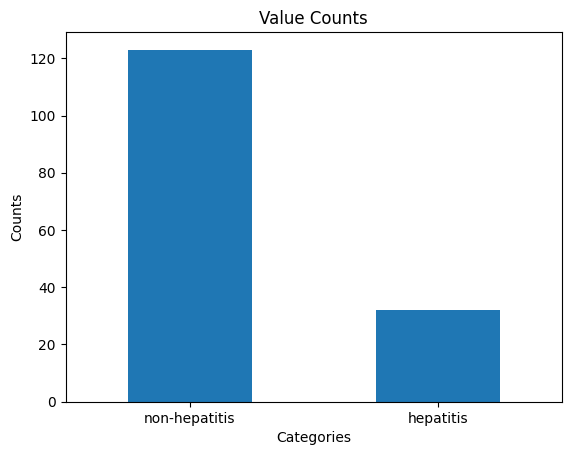

target
1    86
2    86
Name: count, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
# Assuming df contains your dataset

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

y.value_counts().rename({2: 'non-hepatitis', 1: 'hepatitis'}).plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.DataFrame(X_resampled, columns=X.columns)
df['target'] = y_resampled

y_resampled.value_counts()

X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train.value_counts()

In [8]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



classifiers = {
    "LinearSVC": LinearSVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3),
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_leaf=4),
    "KNN": KNeighborsClassifier()
}

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy=[]
precision=[]
recall=[]

for name, model in classifiers.items():

    model.fit(X_train_scaled, y_train)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)


    print(f"\n{name} Metrics:")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    print("Confusion Matrix for Decision Tree:")
    print(confusion_matrix(y_test, test_predictions))

    print("Classification Report:")
    print(classification_report(y_test, test_predictions))

    # Calculate precision
    precision_value = precision_score(y_test, test_predictions)

# Calculate recall
    recall_value = recall_score(y_test, test_predictions)

    accuracy.append([name,test_accuracy])
    precision.append([name,precision_value])
    recall.append([name,recall_value])

    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1 Score:", f1)

# def average_metric(metric_name):
#     return np.mean([cross_val_score(model, X_train, y_train, cv=5, scoring=metric_name).mean() for model in classifiers.values()])


# print("\nAverage Metrics Across Classifiers:")
# print("Average Accuracy:", average_metric('accuracy'))
# print("Average Precision:", average_metric('precision_weighted'))
# print("Average Recall:", average_metric('recall_weighted'))
# print("Average F1 Score:", average_metric('f1_weighted'))

print(accuracy)


LinearSVC Metrics:
Train Accuracy: 0.9534883720930233
Test Accuracy: 0.8648648648648649
Confusion Matrix for Decision Tree:
[[32  5]
 [ 5 32]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        37
           2       0.86      0.86      0.86        37

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74


DecisionTree Metrics:
Train Accuracy: 0.9593023255813954
Test Accuracy: 0.8243243243243243
Confusion Matrix for Decision Tree:
[[30  7]
 [ 6 31]]
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.81      0.82        37
           2       0.82      0.84      0.83        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74


RandomFo

In [9]:
from sklearn.calibration import CalibratedClassifierCV
base_classifiers = [
    ("LinearSVC",  CalibratedClassifierCV(LinearSVC(random_state=42))),
    ("DecisionTree", DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3)),
    ("RandomForest", RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4)),
    ('knn', KNeighborsClassifier())
]

# Define the stacking classifier with Logistic Regression as the meta-classifier
stack_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(random_state=42),
    stack_method='predict_proba',
    cv=5  # Cross-validation strategy for training base classifiers
)

# Train the stacking classifier
stack_clf.fit(X_train_scaled, y_train)

# Predict and evaluate the stacking classifier
final_predictions = stack_clf.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train,stack_clf.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, final_predictions)
print("Training Accuracy of stacking classifier:", train_accuracy)
print("Test Accuracy of stacking classifier:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy of stacking classifier: 0.9825581395348837
Test Accuracy of stacking classifier: 0.8648648648648649


In [10]:
print("Classification Report:")
print(classification_report(y_test, final_predictions))

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.84      0.86        37
           2       0.85      0.89      0.87        37

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [11]:
precision_value = precision_score(y_test, final_predictions)

# Calculate recall
recall_value = recall_score(y_test, final_predictions)

accuracy.append(["Stacked",test_accuracy])
precision.append(["Stacked",precision_value])
recall.append(["Stacked",recall_value])

In [12]:
accuracy

[['LinearSVC', 0.8648648648648649],
 ['DecisionTree', 0.8243243243243243],
 ['RandomForest', 0.8648648648648649],
 ['KNN', 0.8648648648648649],
 ['Stacked', 0.8648648648648649]]

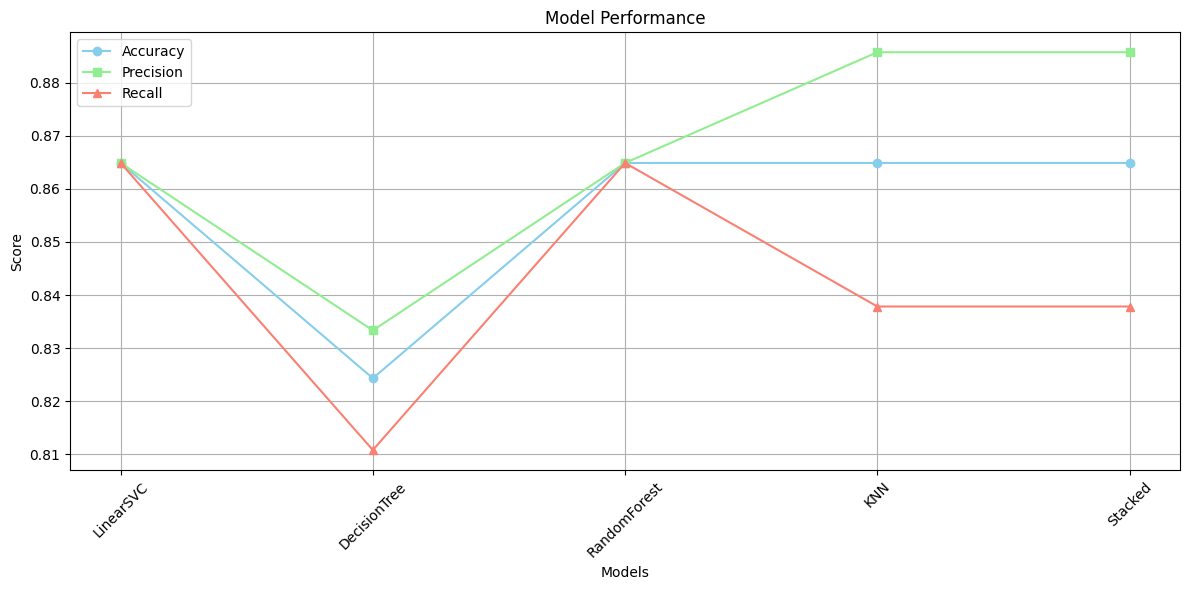

In [13]:
accuracy_scores = [entry[1] for entry in accuracy]  # Extracting model names and removing them from sets
model_names = [entry[0] for entry in accuracy]  # Extracting scores and removing them from sets

precision_scores = [entry[1] for entry in precision]  # Extracting scores and removing them from sets

recall_scores = [entry[1] for entry in recall]  # Extracting scores and removing them from sets

accuracy_scores


plt.figure(figsize=(12, 6))

plt.plot(model_names, accuracy_scores, marker='o', color='skyblue', label='Accuracy')
plt.plot(model_names, precision_scores, marker='s', color='lightgreen', label='Precision')
plt.plot(model_names, recall_scores, marker='^', color='salmon', label='Recall')

plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

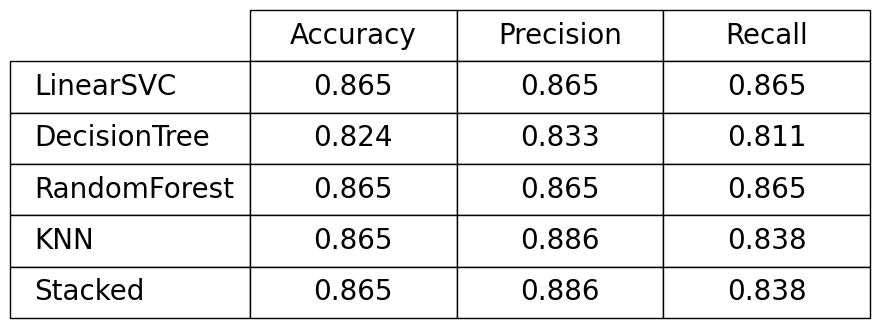

In [14]:
accuracy_scores = [round(score, 3) for score in accuracy_scores]
precision_scores = [round(score, 3) for score in precision_scores]
recall_scores = [round(score, 3) for score in recall_scores]
data = {
    'Model Name': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df = pd.DataFrame(data)
df.set_index('Model Name', inplace=True)

# Create table plot
plt.figure(figsize=(8, 4))
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center',bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(1.2, 1.2)

# Hide axis
plt.axis('off')

# Save table as image
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.05)
